<a href="https://colab.research.google.com/github/amlanmohanty1/Machine-Learning-Mini-Project/blob/feature1/Image_Classification_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader

In [2]:
import bing_image_downloader

In [4]:
cd /content/drive/My Drive

/content/drive/My Drive


In [5]:
!mkdir images1

In [6]:
from bing_image_downloader import downloader
downloader.download('apple fruit', limit=30,  output_dir='images1', adult_filter_off=False, force_replace=True, timeout=60)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.healthbenefitstimes.com/9/gallery/apple/Apple-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.chhajedgarden.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/0/4/04_apples.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.theayurveda.org/wp-content/uploads/2015/08/Apple-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://dairyfoodblog.files.wordpress.com/2017/08/apple4.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://dreamicus.com/data/apple/apple-01.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://aggie-horticulture.tamu.edu/vegetable/files/2011/10/apple26.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://oneflowyogastudio.com/wp-content/uploads/2019/01/Apple-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #8 from http://2.bp.blogspot.com/-M_Vmb930M

In [7]:
from bing_image_downloader import downloader
downloader.download('lemon fruit', limit=30,  output_dir='images1', adult_filter_off=False, force_replace=True, timeout=60)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://liveseasoned.com/wp-content/uploads/2015/06/Lemon-Whole-Split.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://images6.fanpop.com/image/photos/34900000/Lemon-fruit-34914820-1000-1000.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://iheartsomething.files.wordpress.com/2013/05/lemon1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://keelings.ie/wp-content/uploads/2016/04/citrus-1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://images6.fanpop.com/image/photos/34900000/Lemon-fruit-34914824-3000-2000.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://golden-fruits.com/wp-content/uploads/2018/02/lemon-xrysikos-500x500.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://images.homedepot-static.com/productImages/c6b87606-9631-4f2b-ad36-f087c75db5ce/svn/bloomsz-fruit-trees-plants-00416-64_1000.jpg
[%] File Downlo

In [8]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import os

target = []
images = []   # In matrix format
flat_data = []  # In vector format

DATADIR = '/content/drive/My Drive/images1'
CATEGORIES = ['apple fruit','lemon fruit']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

target = np.array(target)
images = np.array(images)
flat_data = np.array(flat_data)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,random_state=0)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C': [1,10,100,100], 'kernel': ['linear']},
            {'C': [1,10,100,100], 'gamma': [0.001,0.0001], 'kernel': ['rbf']},
]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
y_pred = clf.predict(x_test)

In [12]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [13]:
y_test

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.9333333333333333

In [15]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [16]:
model = pickle.load(open('img_model.p','rb'))

Enter your urlhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSNCFYj5-iiu6HGi9LEdUtRXcj6bH1r6NjBqA&usqp=CAU
Predicted output: lemon fruit


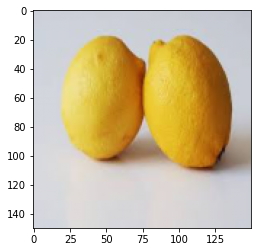

In [22]:
flat_data=[]
url = input("Enter your url")
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
plt.imshow(img_resized)
y_out=clf.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f"Predicted output: {y_out}")